# Example: end-to-end calculation

In [20]:
!pip install matplotlib
!pip install scipy

!cd ../.. && make && python setup.py install



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
cd src && make -f Makefile all
cc -c -o gsetc.o -O3 -DHGCDTE_SUTR -DMOONLIGHT_ gsetc.c
cc gsetc.o -lm -o gsetc.x
cp gsetc.x ../python/pfsspecsim/bin/.
cd src && make -f Makefile.omp all
cc -c -o gsetc_omp.o -O3 -fopenmp -DHGCDTE_SUTR -DMOONLIGHT_ -DQUIET_FOR_OMP gsetc_omp.c
clang: error: unsupported option '-fopenmp'
make[1]: *** [gsetc_omp.o] Error 1
make: *** [all] Error 2


In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scipy as sp
import sys

# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(0, '/Users/quin/ExposuretimecalcHERCULES/spt_ExposureTimeCalculator/python/pfsspecsim')

import pfsetc

etc = pfsetc.Etc()

etc.set_param('EXP_TIME', 1200)
etc.set_param('EXP_NUM', 3)
etc.set_param('OUTFILE_NOISE','out/ref.noise.dat')
etc.set_param('OUTFILE_SNC','out/ref.snc.dat')
etc.set_param('OUTFILE_SNL','out/ref.snl.dat')
etc.set_param('OUTFILE_OII','out/ref.sno2.dat')

etc.run()

etc.make_noise_model()
print(etc.nsm_nois)
etc.make_snc()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
##### starting to run ETC ... (it takes a few min.) #####
Compiler flags: -DHGCDTE_SUTR -DMOONLIGHT_


Error: Can't read file: /Users/quin/ExposuretimecalcHERCULES/spt_ExposureTimeCalculator/python/pfsspecsim/config/PFS.20240714.dat


FileNotFoundError: [Errno 2] No such file or directory: 'out/ref.noise.dat'

['ETC_SRC', 'HOME_DIR', 'INSTR_SETUP', 'INSTR_SETUP_MR', 'NOISE_REUSED', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'get_noise', 'get_snc', 'get_snl', 'get_sno2', 'load_param_file', 'mag_file', 'make_noise_model', 'make_snc', 'make_snl', 'make_sno2', 'nsm_arms', 'nsm_lams', 'nsm_nois', 'nsm_pixs', 'nsm_skys', 'params', 'run', 'set_param', 'snc_arms', 'snc_conv', 'snc_lams', 'snc_nois', 'snc_nois_mobj', 'snc_pixs', 'snc_samp', 'snc_sigs', 'snc_skys', 'snc_sncs', 'snc_spin', 'snl_effa', 'snl_fcov', 'snl_lams', 'snl_sna0', 'snl_sna1', 'snl_sna2', 'snl_snls', 'sno2_effa', 'sno2_fcov', 'sno2_lam1', 'sno2_lam2', 'sno2_sna0', 'sno2_sna1', 'sno2_sna2', 'sno2_sno2', 'sno2_zsps']


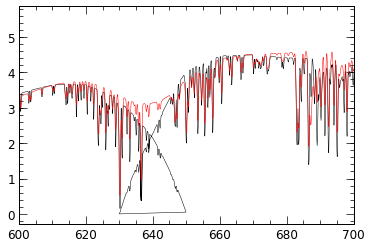

In [7]:
nsm_lam, nsm_var = etc.get_noise()
snc_lam, snc_sn = etc.get_snc()
snl_lam, snl_sn = etc.get_snl()
sno2_lam, sno2_sn = etc.get_sno2()

print(dir(etc))
plt.xlim(600.,700.)
plt.plot(snc_lam, snc_sn * sp.sqrt(3), ls='solid', lw=0.5, color='black')
plt.plot(snl_lam, snl_sn, ls='solid', lw=0.5, color='red')

# Example: computing continuum SNR

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scipy as sp
from pfsspecsim import pfsetc

etc = pfsetc.Etc()

etc.set_param('OUTFILE_NOISE','out/ref.noise.dat')
etc.set_param('OUTFILE_SNC','out/ref.snc.dat')
etc.set_param('OUTFILE_SNL','out/ref.snl.dat')
etc.set_param('OUTFILE_OII','out/ref.sno2.dat')

etc.make_noise_model()  # make noise model
etc.make_snc()          # make S/N curve for continuum
etc.make_snl()          # make S/N curve for an emission line
etc.make_sno2()         # make S/N curve for an [OII] emission line


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
##### starting to make a noise model ... (it takes about 2 min.) #####
##### finished (elapsed_time: 34.3[sec]) #####
##### starting to make an SNC model ... (it takes about 1 min.) #####
##### finished (elapsed_time: 19.4[sec]) #####
##### starting to make an SNL model ... (it takes about 1 min.) #####
##### finished (elapsed_time: 26.1[sec]) #####
##### starting to make an OII model ... (it takes about 2 min.) #####
##### finished (elapsed_time: 36.3[sec]) #####


0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


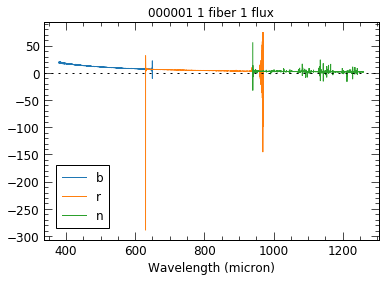

ASCII table test was generated


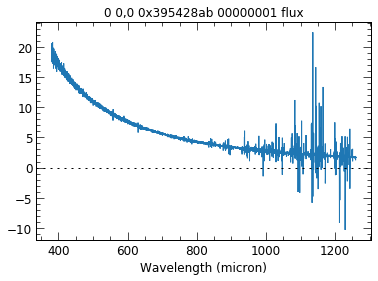

0

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scipy as sp

from pfsspecsim import pfsspec

sim = pfsspec.Pfsspec()

sim.set_param('MAG_FILE', 19.0)
sim.set_param('EXP_NUM',16)
sim.set_param('asciiTable','test')
sim.set_param('nrealize',1)
sim.set_param('plotObject','t')
sim.set_param('plotArmSet','t')

sim.make_sim_spec()
